### Week 14 Homework
##### Angela Spencer - January 5, 2022

In [133]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

from statsmodels.formula.api import ols
from statsmodels.formula.api import logit

In [2]:
#import data
bottle_df = pd.read_csv('../Datasets/bottle.csv', low_memory=False)
cast_df = pd.read_csv('../Datasets/cast.csv', low_memory = False)

### 1.	Perform pre-processing on the full dataset here: https://www.kaggle.com/sohier/calcofi 

##### A. Exploratory Analysis

In [3]:
print(bottle_df.shape)
print(bottle_df.columns)
print(bottle_df.dtypes)

(864863, 74)
Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')
Cst_Cnt                  int64
Btl_Cnt                  int64
Sta_ID                  object
Depth_ID                object
Depthm                   i

In [4]:
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### B. Drop Existing Redundant Columns

In [5]:
#columns to drop
#redundant columns
column_drop = ['Sta_ID', 'Depthm', 'T_degC', 'Salnty', 'STheta', 'RecInd', 'T_prec', 
                'S_prec', 'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq', 'R_POTEMP']
bottle_df.drop(column_drop, axis=1, inplace=True)

##### C. Fill and Drop NaNs

In [6]:
bottle_df.isna().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Depth_ID                    0
O2ml_L                 168662
O2Sat                  203589
Oxy_µmol/Kg            203595
BtlNum                 746196
T_qual                 841736
S_qual                 789949
P_qual                 191108
O_qual                 680187
SThtaq                 799040
O2Satq                 647066
ChlorA                 639591
Chlqua                 225697
Phaeop                 639592
Phaqua                 225693
PO4uM                  451546
PO4q                   413077
SiO3uM                 510772
SiO3qu                 353997
NO2uM                  527287
NO2q                   335389
NO3uM                  527460
NO3q                   334930
NH3uM                  799901
C14As1                 850431
C14A1p                 852103
C14As2                 850449
C14A2p                 852121
DarkAs                 842214
DarkAp                 844406
MeanAs                 842213
MeanAp    

In [7]:
#drop columns with very little data
bottle_df.dropna(axis=1, thresh=700000, inplace=True)
print(bottle_df.shape)
print(bottle_df.columns)

(864863, 10)
Index(['Cst_Cnt', 'Btl_Cnt', 'Depth_ID', 'R_Depth', 'R_TEMP', 'R_SALINITY',
       'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_PRES'],
      dtype='object')


In [8]:
#drop rows with 3+ null values
bottle_df.dropna(axis=0, thresh=9, inplace=True)
print(bottle_df.shape)
bottle_df.isnull().sum()

(812092, 10)


Cst_Cnt          0
Btl_Cnt          0
Depth_ID         0
R_Depth          0
R_TEMP           0
R_SALINITY       0
R_SIGMA         85
R_SVA            0
R_DYNHT       4886
R_PRES           0
dtype: int64

In [9]:
#reset index after dropping rows
bottle_df.reset_index(drop=True, inplace=True)

In [10]:
#view metrics to determine best value to fill NaNs:

#most frequent value
print(bottle_df[['R_SALINITY', 'R_SIGMA', 'R_SVA','R_DYNHT']].value_counts().head(1))

#mean and median value
bottle_df[['R_SALINITY', 'R_SIGMA', 'R_SVA','R_DYNHT']].agg([np.mean, np.median])

R_SALINITY  R_SIGMA  R_SVA  R_DYNHT
33.55       24.87    306.5  0.0        6
dtype: int64


,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT
mean,33.840672,25.81101,220.938918,0.433203
median,33.865000,25.99000,203.200000,0.340000


In [11]:
#variable to hold labels for post transformation
labels = bottle_df.columns
labels

Index(['Cst_Cnt', 'Btl_Cnt', 'Depth_ID', 'R_Depth', 'R_TEMP', 'R_SALINITY',
       'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_PRES'],
      dtype='object')

In [12]:
#instantiate Imputer transformer
#replace NaNs with most frequent value
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent', copy=False)
bottle2 = imp.fit_transform(bottle_df)

#convert to dataframe
bottle_df = pd.DataFrame(bottle2, columns = labels)

#no null values remaining
bottle_df.isnull().sum()

Cst_Cnt       0
Btl_Cnt       0
Depth_ID      0
R_Depth       0
R_TEMP        0
R_SALINITY    0
R_SIGMA       0
R_SVA         0
R_DYNHT       0
R_PRES        0
dtype: int64

##### D. Convert categorical values to numerical

In [13]:
bottle_df.dtypes

Cst_Cnt       object
Btl_Cnt       object
Depth_ID      object
R_Depth       object
R_TEMP        object
R_SALINITY    object
R_SIGMA       object
R_SVA         object
R_DYNHT       object
R_PRES        object
dtype: object

In [14]:
#convert numerical values to integer and float types
bottle_df = bottle_df.convert_dtypes(convert_string=False, convert_boolean=False)
bottle_df.dtypes

Cst_Cnt         Int64
Btl_Cnt         Int64
Depth_ID       object
R_Depth         Int64
R_TEMP        Float64
R_SALINITY    Float64
R_SIGMA       Float64
R_SVA         Float64
R_DYNHT       Float64
R_PRES          Int64
dtype: object

##### E. Feature Engineering - encoding categorical variables

In [15]:
#extract year from Depth_ID (first two digits-second two digits)
#extract station ID for location information(first three digits.one digit)
bottle_df[['Depth_ID']]

,Depth_ID
0,19-4903CR-HY-060-0930-05400560-0000A-3
1,19-4903CR-HY-060-0930-05400560-0008A-3
2,19-4903CR-HY-060-0930-05400560-0010A-7
3,19-4903CR-HY-060-0930-05400560-0019A-3
4,19-4903CR-HY-060-0930-05400560-0020A-7
...,...
812087,20-1611SR-MX-310-2239-09340264-0000A-7
812088,20-1611SR-MX-310-2239-09340264-0002A-3
812089,20-1611SR-MX-310-2239-09340264-0005A-3
812090,20-1611SR-MX-310-2239-09340264-0010A-3


In [16]:
#extract year from Depth_ID column
#example to see the code working
example = '19-4903CR-HY-060-0930-05400560-0000A-3'
pattern = re.compile("\d+\-+\d{2}")
year = re.match(pattern, example)
year_str = str(year.group(0)).replace('-', '')
year_int = int(year_str)
year_int

1949

In [17]:
def extract_year(ex):
    pattern = re.compile("\d+\-+\d{2}")
    year = re.match(pattern, ex)
    year_str = str(year.group(0)).replace('-', '')
    return int(year_str)

#apply function to Depth_ID column, create new column for extracted year
bottle_df['YEAR'] = bottle_df['Depth_ID'].apply(lambda row: extract_year(row))
#convert year to datetime
pd.to_datetime(bottle_df['YEAR'], format='%Y').dt.year
bottle_df[['YEAR', 'Depth_ID']].head()

,YEAR,Depth_ID
0,1949,19-4903CR-HY-060-0930-05400560-0000A-3
1,1949,19-4903CR-HY-060-0930-05400560-0008A-3
2,1949,19-4903CR-HY-060-0930-05400560-0010A-7
3,1949,19-4903CR-HY-060-0930-05400560-0019A-3
4,1949,19-4903CR-HY-060-0930-05400560-0020A-7


In [18]:
#drop redundant Depth_ID column, Cast Count, and Bottle Count
bottle_df.drop('Depth_ID', axis=1, inplace=True)
bottle_df

,Cst_Cnt,Btl_Cnt,R_Depth,R_TEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES,YEAR
0,1,1,0,10.5,33.44,25.64,233.0,0.0,0,1949
1,1,2,8,10.46,33.44,25.65,232.5,0.01,8,1949
2,1,3,10,10.46,33.437,25.65,232.8,0.02,10,1949
3,1,4,19,10.45,33.42,25.64,234.1,0.04,19,1949
4,1,5,20,10.45,33.421,25.64,234.0,0.04,20,1949
...,...,...,...,...,...,...,...,...,...,...
812087,34404,864859,0,18.74,33.408,23.871,402.4,0.0,0,2016
812088,34404,864860,2,18.74,33.408,23.871,402.5,0.008,2,2016
812089,34404,864861,5,18.69,33.415,23.889,400.8,0.02,5,2016
812090,34404,864862,10,18.16,33.406,24.014,389.1,0.04,10,2016


##### F. Normalize data

In [19]:
#view variance 
bottle_df.agg([np.mean, np.var])

,Cst_Cnt,Btl_Cnt,R_Depth,R_TEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES,YEAR
mean,1.779213e+04,4.482971e+05,221.328430,10.863040,33.840672,25.811132,220.938918,0.430596,222.812100,1975.249155
var,1.016212e+08,6.042763e+10,94356.333362,17.814629,0.212775,1.264835,8739.202810,0.146568,96381.439819,412.081239


In [20]:
#log normalize columns with high variance
columns_to_log_norm = ['R_Depth', 'R_SVA', 'R_PRES']

#take log of column value +1 to avoid dividing by 0 errors
for column in columns_to_log_norm:
    bottle_df['log_'+column] = np.log(bottle_df[column]+1)

#drop redundant columns
bottle_df.drop(columns_to_log_norm, axis=1, inplace=True)

In [21]:
#preprocessed dataframe
bottle_df

,Cst_Cnt,Btl_Cnt,R_TEMP,R_SALINITY,R_SIGMA,R_DYNHT,YEAR,log_R_Depth,log_R_SVA,log_R_PRES
0,1,1,10.5,33.44,25.64,0.0,1949,0.0,5.455321,0.0
1,1,2,10.46,33.44,25.65,0.01,1949,2.197225,5.453182,2.197225
2,1,3,10.46,33.437,25.65,0.02,1949,2.397895,5.454466,2.397895
3,1,4,10.45,33.42,25.64,0.04,1949,2.995732,5.460011,2.995732
4,1,5,10.45,33.421,25.64,0.04,1949,3.044522,5.459586,3.044522
...,...,...,...,...,...,...,...,...,...,...
812087,34404,864859,18.74,33.408,23.871,0.0,2016,0.0,5.999929,0.0
812088,34404,864860,18.74,33.408,23.871,0.008,2016,1.098612,6.000176,1.098612
812089,34404,864861,18.69,33.415,23.889,0.02,2016,1.791759,5.995954,1.791759
812090,34404,864862,18.16,33.406,24.014,0.04,2016,2.397895,5.966403,2.397895


#### Preprocessing Cast.csv

##### A. Exploratory Analysis

In [22]:
cast_df.head(3)

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN


In [23]:
print(cast_df.shape)
cast_df.columns

(34404, 61)


Index(['Cst_Cnt', 'Cruise_ID', 'Cruise', 'Cruz_Sta', 'DbSta_ID', 'Cast_ID',
       'Sta_ID', 'Quarter', 'Sta_Code', 'Distance', 'Date', 'Year', 'Month',
       'Julian_Date', 'Julian_Day', 'Time', 'Lat_Dec', 'Lat_Deg', 'Lat_Min',
       'Lat_Hem', 'Lon_Dec', 'Lon_Deg', 'Lon_Min', 'Lon_Hem', 'Rpt_Line',
       'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Bottom_D',
       'Secchi', 'ForelU', 'Ship_Name', 'Ship_Code', 'Data_Type', 'Order_Occ',
       'Event_Num', 'Cruz_Leg', 'Orig_Sta_ID', 'Data_Or', 'Cruz_Num', 'IntChl',
       'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T', 'TimeZone',
       'Wave_Dir', 'Wave_Ht', 'Wave_Prd', 'Wind_Dir', 'Wind_Spd', 'Barometer',
       'Dry_T', 'Wet_T', 'Wea', 'Cloud_Typ', 'Cloud_Amt', 'Visibility'],
      dtype='object')

##### B. Drop Existing Redundant Columns

In [24]:
drop_columns = ['Cruise_ID', 'Cruise', 'Cruz_Sta', 'Cast_ID', 'Sta_ID', 'DbSta_ID', 
                'Sta_Code',  'Date', 'Month', 'Julian_Date', 'Julian_Day', 'Event_Num', 
                'Time', 'Lat_Dec', 'Lat_Min', 'Lat_Hem', 'Lon_Dec', 'Lon_Min', 'Lon_Hem', 
                'Rpt_Line', 'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Data_Type',
                'Ship_Name', 'Ship_Code', 'Order_Occ', 'Orig_Sta_ID', 'Data_Or', 'Cruz_Num', 
                'PST_LAN', 'Civil_T', 'TimeZone']
cast_df.drop(drop_columns, axis=1, inplace=True)


In [25]:
cast_df

,Cst_Cnt,Quarter,Distance,Year,Lat_Deg,Lon_Deg,Bottom_D,Secchi,ForelU,Cruz_Leg,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1,NaN,1949,38,-124,NaN,NaN,NaN,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1,NaN,1949,38,-125,NaN,NaN,NaN,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1,NaN,1949,38,-126,NaN,NaN,NaN,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1,NaN,1949,38,-127,NaN,NaN,NaN,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1,NaN,1949,38,-128,NaN,NaN,NaN,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34399,34400,4,-254.345,2016,30,-121,4125.0,NaN,NaN,1.0,...,NaN,34.0,16.0,1017.5,17.1,16.4,NaN,NaN,NaN,NaN
34400,34401,4,-294.297,2016,30,-122,4192.0,NaN,NaN,1.0,...,NaN,36.0,14.0,1019.6,18.0,16.2,NaN,NaN,NaN,NaN
34401,34402,4,-334.157,2016,30,-122,3731.0,NaN,NaN,1.0,...,15.0,35.0,16.0,1018.6,19.0,17.0,1.0,6.0,6.0,4.0
34402,34403,4,-373.979,2016,29,-123,4149.0,25.0,NaN,1.0,...,10.0,36.0,16.0,1016.3,19.5,17.1,1.0,3.0,7.0,5.0


##### C. Fill / Drop Null Values

In [26]:
#view number of null values by column
cast_df.isnull().sum()

Cst_Cnt           0
Quarter           0
Distance      14690
Year              0
Lat_Deg           0
Lon_Deg           0
Bottom_D       2281
Secchi        29141
ForelU        32327
Cruz_Leg      32940
IntChl        22201
IntC14        32275
Inc_Str       32271
Inc_End       32271
Wave_Dir      21846
Wave_Ht       22306
Wave_Prd      22770
Wind_Dir       1476
Wind_Spd       1679
Barometer     15341
Dry_T         15333
Wet_T         15415
Wea            7597
Cloud_Typ     24484
Cloud_Amt     22522
Visibility    24897
dtype: int64

In [27]:
#drop columns with mostly null values
cast_df.dropna(axis=1, thresh = 27000, inplace=True)

cast_df.shape

(34404, 8)

In [28]:
#drop rows with 2 or more null values
cast_df.dropna(axis=0, thresh=6, inplace=True)

cast_df.shape

(33930, 8)

In [29]:
cast_df.isnull().sum()

Cst_Cnt        0
Quarter        0
Year           0
Lat_Deg        0
Lon_Deg        0
Bottom_D    1807
Wind_Dir    1002
Wind_Spd    1205
dtype: int64

In [30]:
#reset index after dropping rows
cast_df.reset_index(drop=True, inplace=True)
cast_df.shape

(33930, 8)

In [31]:
#column labels to apply after imputer transformation
cast_labels = ['Cst_Cnt', 'Quarter', 'Year', 'Lat_Deg', 'Lon_Deg', 
               'Bottom_D', 'Wind_Dir', 'Wind_Spd']

In [32]:
#view metrics to determine best value to fill NaNs:
#most frequent value
print(cast_df[['Bottom_D', 'Wind_Dir', 'Wind_Spd']].value_counts().head(1))

#mean and median value
cast_df[['Bottom_D', 'Wind_Dir', 'Wind_Spd']].agg([np.mean, np.median])

Bottom_D  Wind_Dir  Wind_Spd
3658.0    32.0      8.0         61
dtype: int64


,Bottom_D,Wind_Dir,Wind_Spd
mean,2249.632693,27.067602,11.135951
median,2103.000000,31.000000,10.000000


In [33]:
#instantiate Imputer transformer
#replace NaNs with most frequent value
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent', copy=False)
cast2 = imp.fit_transform(cast_df)

#convert to dataframe
cast_df = pd.DataFrame(cast2, columns = cast_labels)

#no null values remaining
cast_df.isnull().sum()

Cst_Cnt     0
Quarter     0
Year        0
Lat_Deg     0
Lon_Deg     0
Bottom_D    0
Wind_Dir    0
Wind_Spd    0
dtype: int64

In [34]:
#convert numerical values to integer and float types
cast_df = cast_df.convert_dtypes(convert_string=False, convert_boolean=False)
cast_df.dtypes

Cst_Cnt     Int64
Quarter     Int64
Year        Int64
Lat_Deg     Int64
Lon_Deg     Int64
Bottom_D    Int64
Wind_Dir    Int64
Wind_Spd    Int64
dtype: object

##### D. Feature engineering - encoding variables

In [35]:
#'Quarter' is a categorical value for spring
# one hot encode and add to original df
#y = pd.get_dummies(cast_df['Quarter'], prefix='Quarter')

cast_df = pd.concat([cast_df, pd.get_dummies(cast_df['Quarter'], prefix='Quarter')], axis=1)
cast_df

,Cst_Cnt,Quarter,Year,Lat_Deg,Lon_Deg,Bottom_D,Wind_Dir,Wind_Spd,Quarter_1,Quarter_2,Quarter_3,Quarter_4
0,1,1,1949,38,-124,3658,23,18,1,0,0,0
1,2,1,1949,38,-125,3658,16,5,1,0,0,0
2,3,1,1949,38,-126,3658,23,5,1,0,0,0
3,4,1,1949,38,-127,3658,18,8,1,0,0,0
4,5,1,1949,38,-128,3658,27,13,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
33925,34400,4,2016,30,-121,4125,34,16,0,0,0,1
33926,34401,4,2016,30,-122,4192,36,14,0,0,0,1
33927,34402,4,2016,30,-122,3731,35,16,0,0,0,1
33928,34403,4,2016,29,-123,4149,36,16,0,0,0,1


In [36]:
#drop duplicate column
cast_df.drop('Quarter', axis=1, inplace=True)
cast_df

,Cst_Cnt,Year,Lat_Deg,Lon_Deg,Bottom_D,Wind_Dir,Wind_Spd,Quarter_1,Quarter_2,Quarter_3,Quarter_4
0,1,1949,38,-124,3658,23,18,1,0,0,0
1,2,1949,38,-125,3658,16,5,1,0,0,0
2,3,1949,38,-126,3658,23,5,1,0,0,0
3,4,1949,38,-127,3658,18,8,1,0,0,0
4,5,1949,38,-128,3658,27,13,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
33925,34400,2016,30,-121,4125,34,16,0,0,0,1
33926,34401,2016,30,-122,4192,36,14,0,0,0,1
33927,34402,2016,30,-122,3731,35,16,0,0,0,1
33928,34403,2016,29,-123,4149,36,16,0,0,0,1


##### E. Normalizing Data

In [37]:
#variance is low so normalization is not necessary
cast_df.agg([np.mean, np.var])

,Cst_Cnt,Year,Lat_Deg,Lon_Deg,Bottom_D,Wind_Dir,Wind_Spd,Quarter_1,Quarter_2,Quarter_3,Quarter_4
mean,1.712811e+04,1973.886944,31.291188,-119.248276,2.324638e+03,27.213263,11.024580,0.278957,0.270793,0.250015,0.200236
var,9.945035e+07,393.772240,13.541780,16.178034,2.548621e+06,87.479997,45.242934,0.201146,0.197470,0.187513,0.160146


### Merge Bottle and Cast Dataframes

In [38]:
df = pd.merge(bottle_df, cast_df, on='Cst_Cnt')
df

,Cst_Cnt,Btl_Cnt,R_TEMP,R_SALINITY,R_SIGMA,R_DYNHT,YEAR,log_R_Depth,log_R_SVA,log_R_PRES,Year,Lat_Deg,Lon_Deg,Bottom_D,Wind_Dir,Wind_Spd,Quarter_1,Quarter_2,Quarter_3,Quarter_4
0,1,1,10.5,33.44,25.64,0.0,1949,0.0,5.455321,0.0,1949,38,-124,3658,23,18,1,0,0,0
1,1,2,10.46,33.44,25.65,0.01,1949,2.197225,5.453182,2.197225,1949,38,-124,3658,23,18,1,0,0,0
2,1,3,10.46,33.437,25.65,0.02,1949,2.397895,5.454466,2.397895,1949,38,-124,3658,23,18,1,0,0,0
3,1,4,10.45,33.42,25.64,0.04,1949,2.995732,5.460011,2.995732,1949,38,-124,3658,23,18,1,0,0,0
4,1,5,10.45,33.421,25.64,0.04,1949,3.044522,5.459586,3.044522,1949,38,-124,3658,23,18,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807497,34404,864859,18.74,33.408,23.871,0.0,2016,0.0,5.999929,0.0,2016,32,-117,20,25,2,0,0,0,1
807498,34404,864860,18.74,33.408,23.871,0.008,2016,1.098612,6.000176,1.098612,2016,32,-117,20,25,2,0,0,0,1
807499,34404,864861,18.69,33.415,23.889,0.02,2016,1.791759,5.995954,1.791759,2016,32,-117,20,25,2,0,0,0,1
807500,34404,864862,18.16,33.406,24.014,0.04,2016,2.397895,5.966403,2.397895,2016,32,-117,20,25,2,0,0,0,1


In [39]:
#drop duplicate year column
df.drop('Year', axis=1, inplace=True)

### 2.	Perform feature selection (decide what columns should be included in your analysis). How did you figure out what features were important?

Looking at the heatmap below shows the absolute value of correlation between columns in the combined dataframe.  Correlation is present between Temperature, Salinity, Sigma, Dynamic Height, Depth, SVA, and Pressure. There is  also slight correlation between Bottom Depth and Longitude and Salinity and Latitude. Based on this visualization I would choose the first set of columns (Temperature, Salinity, Sigma, Dynamic Height, Depth, SVA, and Pressure) to analyze.

After creating the heatmap, I used a Lasso regression to isolate the features that have the highest interaction.  Based on the Lasso regression, I chose to use R_SIGMA, log_R_Depth, log_R_PRES, and Lat_deg as these all had some signicant coefficients.

In [40]:
X = np.array(df.drop('R_TEMP', axis=1))
y = np.array(df['R_TEMP']).reshape(-1,1)

#y = X.reshape(-1,1)
y.shape
X.shape

(807502, 18)

In [41]:
lasso = Lasso(alpha=0.6)

lasso_coef = lasso.fit(X,y).coef_
lasso_coef


C:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1413564.4753657014, tolerance: 1438.5681991875047
  model = cd_fast.enet_coordinate_descent(


array([-1.84351071e-05,  1.06290457e-06, -0.00000000e+00, -1.45975262e+00,
       -0.00000000e+00, -0.00000000e+00, -2.73080356e-01,  0.00000000e+00,
       -8.93979962e-01, -2.18062833e-01,  0.00000000e+00, -3.98997094e-05,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

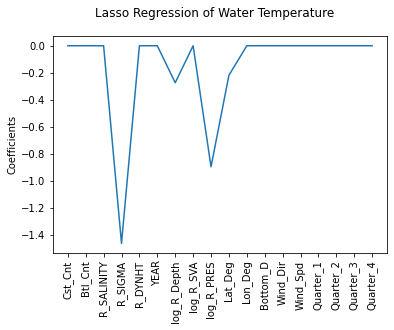

In [42]:
X_labels = df.drop('R_TEMP', axis=1).columns

n = plt.plot(range(len(X_labels)), lasso_coef)
n = plt.xticks(range(len(X_labels)), X_labels, rotation=90)
n = plt.ylabel('Coefficients')
n = plt.suptitle('Lasso Regression of Water Temperature')

plt.show()

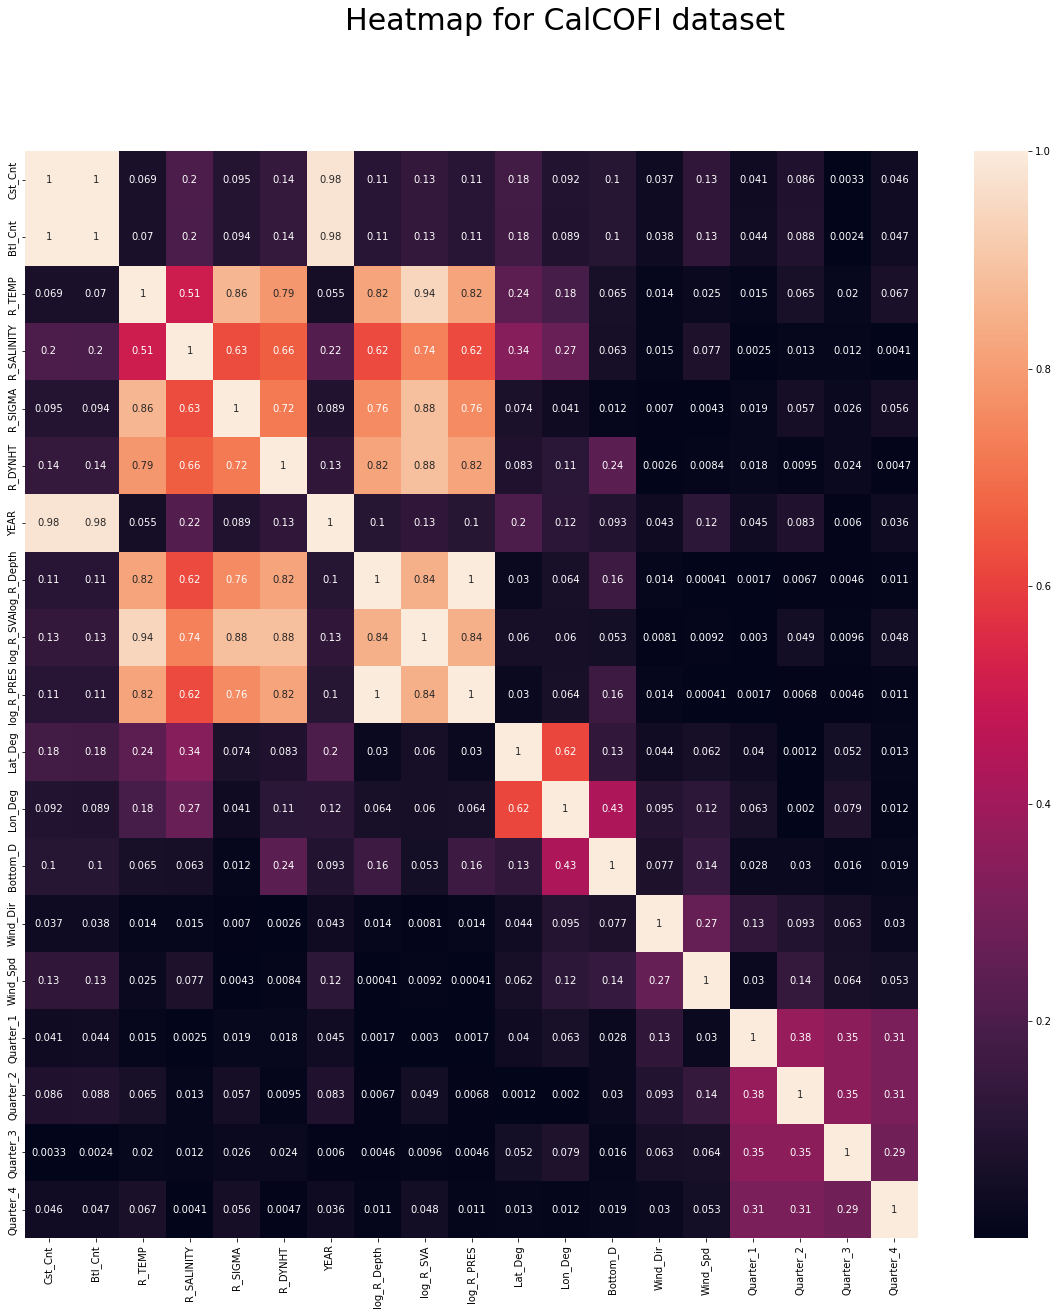

In [43]:
corr_matrix = abs(df.corr())

fig, ax = plt.subplots(figsize=(20,20))
fig.suptitle('Heatmap for CalCOFI dataset', fontsize=30)
sns.heatmap(corr_matrix, annot=True)
plt.show()

### 3.	Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown. 

##### Multiple Linear Regression Equation:
$ temperature = (-1.77)*sigma + (160.09)*depth + (-161.08)*pressure + (-.023)*latitude + 68.98 $

In [44]:
#isolate variables of interest
reg_df = df[['R_TEMP', 'R_SIGMA', 'log_R_Depth', 'log_R_PRES', 'Lat_Deg']]
#convert to float 32 from int64 and float64
reg_df = pd.DataFrame(np.float32(reg_df), columns=reg_df.columns)

# X = explanatory variables
X = reg_df[['R_SIGMA', 'log_R_Depth', 'log_R_PRES', 'Lat_Deg']]

# y = target variable
y = reg_df[['R_TEMP']]

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)


In [45]:
#Multiple Linear Regression with scikitlearn
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)
y_pred_reg

array([[14.707909 ],
       [13.635391 ],
       [ 8.467606 ],
       ...,
       [12.635654 ],
       [13.236301 ],
       [ 7.3115005]], dtype=float32)

In [46]:
#unpack coefficients and intercept into variables
sigma_coef = round(reg.coef_[0, 0],2)
depth_coef = round(reg.coef_[0, 1],2)
pressure_coef = round(reg.coef_[0,2],2)
latitude_coef = round(reg.coef_[0,3],2)
intercept = round(reg.intercept_[0],2)

In [47]:
print('Regression coefficients:') 
print('Sigma = {}, Depth = {}, Pressure = {}, Latitude = {}'.format(sigma_coef, 
                                                                    depth_coef, 
                                                                    pressure_coef, 
                                                                    latitude_coef))
print(' ')
print('Regression intercept: {}'.format(intercept))

Regression coefficients:
Sigma = -1.7699999809265137, Depth = 160.08999633789062, Pressure = -161.0800018310547, Latitude = -0.23000000417232513
 
Regression intercept: 68.9800033569336


### 4.	Which regression approach had the “best” performance? Be sure to compare it to what you did last week.

##### Simple vs. Multiple Linear Regression:
The Multiple Linear Regression (MLR) had much better performance compared to the Simple Linear Regression (SLR).  The MLR R-Squared value was 0.86 compared to 0.23 for the SLR. The RSquared vales exists on a scale of 0 to 1 with 1 being perfect performance.  The root mean squared error (RMSE) value was 1.58 for the MLR compared to 3.73 for the SLR. The RMSE shows improved performance as the value approaches 0, with 0 being perfect model performance.

##### Simple Vs. Multiple Linear Regression Metrics:

In [48]:
print('Accuracy metrics for Multiple Linear Regression:')
print('Temperature vs. Sigma, Depth, Pressure, and Latitude with Interaction')
print('R-Squared: {}'.format(reg.score(X_test, y_test)))
print('Root Mean Squared Error: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred_reg))))

print('')
print('Accuracy metrics for Simple Linear Regression:')
print('Temperature vs. Salinity')
print('R-Squared = 0.23')
print('MSE = 3.73')

Accuracy metrics for Multiple Linear Regression:
Temperature vs. Sigma, Depth, Pressure, and Latitude with Interaction
R-Squared: 0.8596335172616995
Root Mean Squared Error: 1.580096960067749

Accuracy metrics for Simple Linear Regression:
Temperature vs. Salinity
R-Squared = 0.23
MSE = 3.73


### 5.	Work with the diabetes dataset to perform multiple logistic regression. 

In [49]:
diabetes_df = pd.read_csv('../Datasets/diabetes.csv')
diabetes_df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [50]:
#Explore diabetes df
print(diabetes_df.shape)
print(' ')
print(diabetes_df.columns)
print(' ')
print(diabetes_df.dtypes)
print(' ')
print(diabetes_df.isnull().sum())

(768, 9)
 
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [51]:
#isolate variables of interest
Xd = diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
yd = diabetes_df['Outcome']

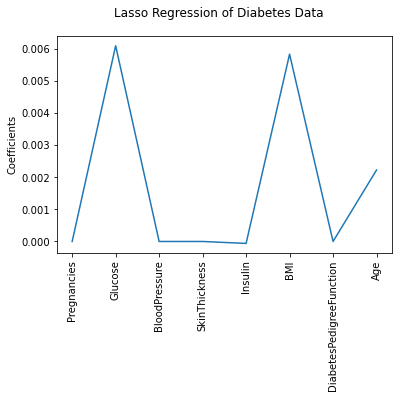

In [52]:
# Lasso regression to determine 
lasso = Lasso(alpha=0.4)
lasso_diabetes_coef = lasso.fit(Xd, yd).coef_

# Plot the Lasso producted coefficients
X_labels = Xd.columns

d = plt.plot(range(len(X_labels)), lasso_diabetes_coef)
d = plt.xticks(range(len(X_labels)), X_labels, rotation=90)
d = plt.ylabel('Coefficients')
d = plt.suptitle('Lasso Regression of Diabetes Data')

plt.show()

In [53]:
## isolate features of interest based on the Lasso regression
Xd2 = diabetes_df[['Glucose', 'BMI', 'Age']]

#train test split
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd2, yd, random_state=26)

#instantiate logistic regression class
logreg=LogisticRegression()
logreg.fit(Xd_train, yd_train)
yd_pred = logreg.predict(Xd_test)
yd_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

### 6.	What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why? 

##### Diabetes Logistic Regression Model Performance:
For the diabetes data set, the logistic regression model produced an array of predictions based on the testing data and unseen outcomes.  

Of these 192 predictions, 108 were correctly predicted as false and 39 were correctly predicted as true (147 correct predictions).  

Of the 45 predictions that were predicted incorrectly, 22 were false negatives (predicted false, actually positive) and 23 were false positives (predicted positive, actually false).

These results produce an accuracy rate of 76% meaning that 76% of the outcomes were correctly predicted.  Recall and precision parse the truley positive outcomes in relationship to total actual positives (recall) and total predicted positives (precision). In the case of this dataset, recall and precision are nearly identical.  

For this particular dataset, the consequences of a false negative can have the most dangerous outcomes for the population this model is designed to help.  A false negative would mean that an individual is actually diabetic and is predicted to be not diabetic by the model, in that case the recall rate is the metric that is most useful.  As the false negative value decreases, the precision will increase with an ideal ratio being nearly 1.

https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

In [54]:
#confusion matrix and classification report
matrix = confusion_matrix(yd_test, yd_pred)
report = classification_report(yd_test, yd_pred)
print(matrix)
print(report)

[[108  23]
 [ 22  39]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       131
           1       0.63      0.64      0.63        61

    accuracy                           0.77       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.77      0.77      0.77       192



Text(0.5, 257.44, 'Predicted label')

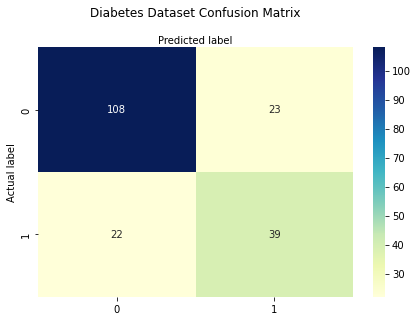

In [55]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Diabetes Dataset Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [56]:
#extract values from confusion matrix
TP = matrix[1,1]
TN = matrix[0,0]
FP = matrix[0,1] #case is negative, predicted positive
FN = matrix[1,0] #case is positive, predicted negative

#calculate metrics
accuracy = round(100*round((TP+TN)/(TP+TN+FP+FN),2))
precision = round(100*round((TP)/(TP+FP),2))
recall = round(100*round((TP)/(TP+FN),2))

#print rounded percentages
print('The accuracy rate is: {}%'.format(accuracy))
print('The precision rate is: {}%'.format(precision))
print('The recall rate is: {}%'.format(recall))

The accuracy rate is: 77%
The precision rate is: 63%
The recall rate is: 64%


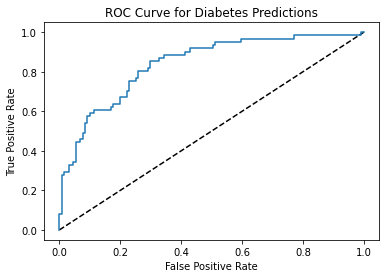

In [69]:
#returns array with two columns containing probabilities
yd_pred_prob = logreg.predict_proba(Xd_test)[:,1]

#unpacks three variables that can be plotted        
fpr,tpr,thresholds = roc_curve(yd_test, yd_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Predictions')
plt.show();

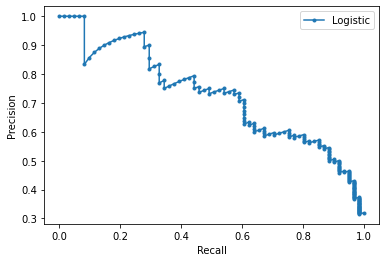

In [80]:
#extract precision and recall information
lr_precision, lr_recall, _ = precision_recall_curve(yd_test, yd_pred_prob)
lr_precision

# plot the precision-recall curve
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

### 7.	Tune your model to improve performance based on the performance metric you identified in question 6. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters. Please note: data scientists need to constantly learn new approaches to optimizing models. This is one way of doing that.

#### Parameter Tuning:
In the code below I performed a second logistic regression in order to tune the parameter C and the solver parameter which affects the l1 and l2 parameters. This cross validation produced the same results as the original model.  When I manuallt adjusted these two parameters, I only drastically decreased recall. 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://www.analyticssteps.com/blogs/l2-and-l1-regularization-machine-learning

https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

https://muthu.co/understanding-the-classification-report-in-sklearn/

###### Parameter Tuning C and solver (l1 and l2) with GridSearch:

In [125]:
#grid-search cross validation
c_space=np.logspace(-5, 8, 15)
param_grid = {'C':c_space, 'solver':['lbfgs', 'liblinear', 'newton-cg']}
cv = GridSearchCV(LogisticRegression(), param_grid, cv=6)
cv.fit(Xd2, yd)
cv.best_params_

{'C': 0.006105402296585327, 'solver': 'lbfgs'}

In [126]:
#instantiate logistic regression class using C = 0.05
logreg2=LogisticRegression(C=0.006)
logreg2.fit(Xd_train, yd_train)
yd_pred2 = logreg2.predict(Xd_test)

#confusion matrix and classification report
matrix2 = confusion_matrix(yd_test, yd_pred2)
report2 = classification_report(yd_test, yd_pred2)
print(matrix2)
print(report2)

[[108  23]
 [ 22  39]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       131
           1       0.63      0.64      0.63        61

    accuracy                           0.77       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.77      0.77      0.77       192



Text(0.5, 15.0, 'Predicted label')

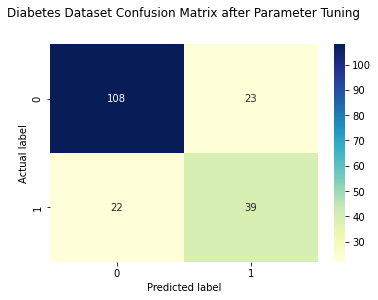

In [127]:
#plot confusion matrix
fig, ax = plt.subplots()
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Diabetes Dataset Confusion Matrix after Parameter Tuning', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [128]:
#extract values from confusion matrix
TP2 = matrix2[1,1]
TN2 = matrix2[0,0]
FP2 = matrix2[0,1]
FN2 = matrix2[1,0]

#calculate metrics
accuracy2 = round(100*round((TP2+TN2)/(TP2+TN2+FP2+FN2),2))
precision2 = round(100*round((TP2)/(TP2+FP2),2))
recall2 = round(100*round((TP2)/(TP2+FN2),2))

#print rounded percentages
print('Accuracy metrics with GridSearch parameter tuning:')
print('The accuracy rate is: {}%'.format(accuracy2))
print('The precision rate is: {}%'.format(precision2))
print('The recall rate is: {}%'.format(recall2))

Accuracy metrics with C parameter tuning:
The accuracy rate is: 77%
The precision rate is: 63%
The recall rate is: 64%


###### Parameter Tuning C and solver (l1 and l2) manually:

In [129]:
#instantiate logistic regression class using C = 0.1
logreg3=LogisticRegression(C=0.01, solver='liblinear')
logreg3.fit(Xd_train, yd_train)
yd_pred3 = logreg3.predict(Xd_test)

#confusion matrix and classification report
matrix3 = confusion_matrix(yd_test, yd_pred3)
report3 = classification_report(yd_test, yd_pred3)
print(matrix3)
print(report3)

[[117  14]
 [ 49  12]]
              precision    recall  f1-score   support

           0       0.70      0.89      0.79       131
           1       0.46      0.20      0.28        61

    accuracy                           0.67       192
   macro avg       0.58      0.54      0.53       192
weighted avg       0.63      0.67      0.63       192



Accuracy metrics with C, l1, and l2 parameter tuning:
The accuracy rate is: 67%
The precision rate is: 46%
The recall rate is: 20%


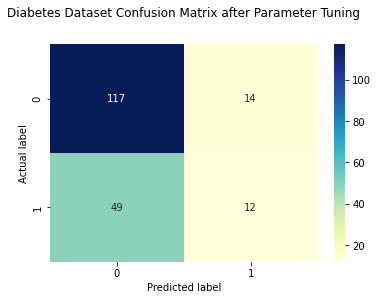

In [130]:
#plot confusion matrix
fig, ax = plt.subplots()
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(matrix3), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Diabetes Dataset Confusion Matrix after Parameter Tuning', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#extract values from confusion matrix
TP3 = matrix3[1,1]
TN3 = matrix3[0,0]
FP3 = matrix3[0,1]
FN3 = matrix3[1,0]

#calculate metrics
accuracy3 = round(100*round((TP3+TN3)/(TP3+TN3+FP3+FN3),2))
precision3 = round(100*round((TP3)/(TP3+FP3),2))
recall3 = round(100*round((TP3)/(TP3+FN3),2))

#print rounded percentages
print('Accuracy metrics with C, l1, and l2 parameter tuning:')
print('The accuracy rate is: {}%'.format(accuracy3))
print('The precision rate is: {}%'.format(precision3))
print('The recall rate is: {}%'.format(recall3))

##### Comparing all parameter tuning models:

In [132]:
print('Accuracy metrics for initial model:')
print('The accuracy rate is: {}%'.format(accuracy))
print('The precision rate is: {}%'.format(precision))
print('The recall rate is: {}%'.format(recall))
print(' ')
print('Accuracy metrics with GridSearch:')
print('The accuracy rate is: {}%'.format(accuracy2))
print('The precision rate is: {}%'.format(precision2))
print('The recall rate is: {}%'.format(recall2))
print(' ')
print('Accuracy metrics with manual tuning:')
print('The accuracy rate is: {}%'.format(accuracy3))
print('The precision rate is: {}%'.format(precision3))
print('The recall rate is: {}%'.format(recall3))

Accuracy metrics for initial model:
The accuracy rate is: 77%
The precision rate is: 63%
The recall rate is: 64%
 
Accuracy metrics with GridSearch:
The accuracy rate is: 77%
The precision rate is: 63%
The recall rate is: 64%
 
Accuracy metrics with manual tuning:
The accuracy rate is: 67%
The precision rate is: 46%
The recall rate is: 20%


### 8.	Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell? 

##### KNN optimization:
In the code below I define a function that optimizes the KNN n_neighbors parameter at 47.  In the resulting confusion matrix and perfomrance metric calculation, the accurracy of the KNN model is 78% compared to the original Logistic Regression model accuracy of 77%.  Precision is also improved by 1% in the KNN model. The metric of interest, however, is the recall, which is affected most drastically by the number of false negatives.  For the KNN, recall is 72%, compared to 64% in the Logistic Regresion model. Because this metric was chosen as the best measure of performance in order to reduce the number of false negatives, KNN seems to be vastly superior to the Logistic Regression for the diabetes dataset.

In [135]:
#create empty lists to hold data from the loop below
k_values = []
accuracy_values = []

#write a function to loop through the KNN process
def knn_func():
    for k in range(1,52,2):
        
        #set the KNN classifier
        knn=KNeighborsClassifier(n_neighbors=k)
        #fit to training data
        knn.fit(Xd_train, yd_train)
        #predict the testing data
        y_predict_knn = knn.predict(Xd_test)
        #find the accuracy score
        accuracy_knn = knn.score(Xd_test,yd_test)
        #append the score and k value to lists
        accuracy_values.append(accuracy_knn)
        k_values.append(k)
    else:
        pass
    
    #create a dataframe from the appended lists
    k_values_series = pd.Series(k_values, name = 'k')
    accuracy_values_series = pd.Series(accuracy_values, name = 'accuracy')
    knn_df = pd.concat([k_values_series, accuracy_values_series], axis=1)
    
    #sort the dataframe to find the maximum accuracy score and lowest k value
    #change index to match sorted data
    results = knn_df.sort_values(['accuracy', 'k'], 
                                 ascending=[False,True], ignore_index=True)
    
    #return the first row of the sorted df
    return results.loc[0]

In [136]:
knn_func()

k           47.00000
accuracy     0.78125
Name: 0, dtype: float64

In [139]:
knn=KNeighborsClassifier(n_neighbors=47)
knn.fit(Xd_train,yd_train)
yd_pred_knn = knn.predict(Xd_test)

#confusion matrix and classification report
matrix_knn = confusion_matrix(yd_test, yd_pred_knn)
report_knn = classification_report(yd_test, yd_pred_knn)
print(matrix_knn)
print(report_knn)

[[106  25]
 [ 17  44]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       131
           1       0.64      0.72      0.68        61

    accuracy                           0.78       192
   macro avg       0.75      0.77      0.76       192
weighted avg       0.79      0.78      0.78       192



Accuracy metrics with KNN optimization:
The accuracy rate is: 78%
The precision rate is: 64%
The recall rate is: 72%
 
Accuracy metrics with LogisticRegression and GridSearchCV:
The accuracy rate is: 77%
The precision rate is: 63%
The recall rate is: 64%


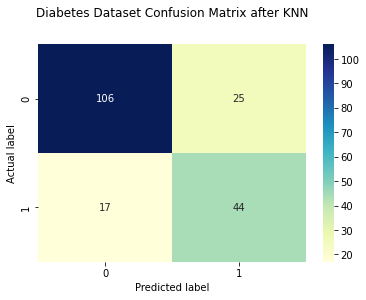

In [144]:
#plot confusion matrix
fig, ax = plt.subplots()
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(matrix_knn), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Diabetes Dataset Confusion Matrix after KNN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#extract values from confusion matrix
TP_knn = matrix_knn[1,1]
TN_knn = matrix_knn[0,0]
FP_knn = matrix_knn[0,1]
FN_knn = matrix_knn[1,0]

#calculate metrics
accuracy_knn = round(100*round((TP_knn+TN_knn)/(TP_knn+TN_knn+FP_knn+FN_knn),2))
precision_knn = round(100*round((TP_knn)/(TP_knn+FP_knn),2))
recall_knn = round(100*round((TP_knn)/(TP_knn+FN_knn),2))

#print rounded percentages
print('Accuracy metrics with KNN optimization:')
print('The accuracy rate is: {}%'.format(accuracy_knn))
print('The precision rate is: {}%'.format(precision_knn))
print('The recall rate is: {}%'.format(recall_knn))
print(' ')
#print rounded percentages
print('Accuracy metrics with LogisticRegression and GridSearchCV:')
print('The accuracy rate is: {}%'.format(accuracy2))
print('The precision rate is: {}%'.format(precision2))
print('The recall rate is: {}%'.format(recall2))

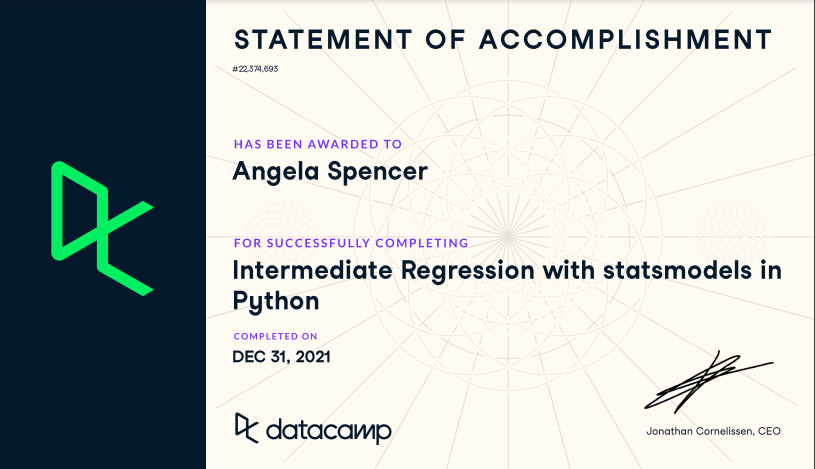